In [128]:
from math import sin,cos,sqrt,asin,pi
 
r = 6371000 #radio terrestre medio, en metros
 
c = pi/180 #constante para transformar grados en radianes
 
#Fórmula de haversine
def formula_haversine(lat1, lat2, long1, long2):
    distancia = 2*r*asin(sqrt(sin(c*(lat2-lat1)/2)**2 + cos(c*lat1)*cos(c*lat2)*sin(c*(long2-long1)/2)**2))
    return distancia

def cant_paradas(lat_prop, lon_prop):
    cant_paradas = 0
    
    for lat_parada, lon_parada in zip(paradas_colectivos['Y'], paradas_colectivos['X']):
        lat_parada= float(lat_parada.replace(',', '.'))
        lon_parada = float(lon_parada.replace(',', '.'))
        
        distancia = formula_haversine(lat_prop, lat_parada, lon_prop, lon_parada)
        if distancia < 500:
            cant_paradas = cant_paradas +  1
    
    return cant_paradas

def cant_locales_bailables(lat_prop, lon_prop):
    cant_locales_bailables = 0
    
    for lat_parada, lon_parada in zip(locales_bailables['Y'], locales_bailables['X']):
        lat_parada= float(lat_parada.replace(',', '.'))
        lon_parada = float(lon_parada.replace(',', '.'))
        
        distancia = formula_haversine(lat_prop, lat_parada, lon_prop, lon_parada)
        if distancia < 300:
            cant_locales_bailables = cant_locales_bailables + 1
    
    return cant_locales_bailables

def cant_ferrocarriles(lat_prop, lon_prop):
    cant_ferrocarriles = 0
    
    for lat_parada, lon_parada in zip(estaciones_ferrocarrill['LAT'], estaciones_ferrocarrill['LNG']):
        distancia = formula_haversine(lat_prop, lat_parada, lon_prop, lon_parada)
        if distancia < 400:
            cant_ferrocarriles =  cant_ferrocarriles + 1
    
    return cant_ferrocarriles

def cant_comisarias(lat_prop, lon_prop):
    cant_comisarias = 0
    
    for lat_parada, lon_parada in zip(comisarias['Y'], comisarias['X']):
        lat_parada= float(lat_parada.replace(',', '.'))
        lon_parada = float(lon_parada.replace(',', '.'))
        
        distancia = formula_haversine(lat_prop, lat_parada, lon_prop, lon_parada)
        if distancia < 1000:
            cant_comisarias =  cant_comisarias + 1
    
    return cant_comisarias

In [2]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Genereramos un dataframe con los datos del 2017 para la zona de capital federal
#Eliminamos las columnas que no utilizaremos en nuestro análisis

props_2017 = pd.read_csv('../Downloads/properati-AR-2017-08-01-properties-sell-six_months.csv')
props_2017.drop(['operation','image_thumbnail','properati_url', 'id', 'country_name', 'created_on', 'property_type', 'geonames_id', 'lat-lon', 'rooms', 'title', 'description','expenses'], axis = 1, inplace = True)
props_2017.drop_duplicates()
props_2017 = props_2017[(props_2017.state_name == "Capital Federal")]

props_2017

,place_name,place_with_parent_names,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor
0,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN
2,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN
3,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN
7,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN
8,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN
13,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,111700.0,USD,1970890.65,111700.00,50.0,30.0,2234.000000,3723.333333,NaN
14,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,147900.0,USD,2609621.55,147900.00,42.0,31.0,3521.428571,4770.967742,NaN
16,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652356,-58.501624,239000.0,USD,4217035.50,239000.00,140.0,98.0,1707.142857,2438.775510,NaN
19,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.580504,-58.405874,350000.0,USD,6175575.00,350000.00,104.0,96.0,3365.384615,3645.833333,NaN
21,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.590926,-58.411665,270500.0,USD,4772837.25,270500.00,118.0,73.0,2292.372881,3705.479452,NaN


In [4]:
paradas_colectivos = pd.read_csv('data_sets_externos/paradas-de-colectivo.csv', delim_whitespace=False, delimiter=';')
paradas_colectivos

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI
0,"-58,4327908137487","-34,5923809470",1000086,PARADAS CON REFUGIO,CORDOBA AV.,4859,ARMENIA,GURRUCHAGA,"{151,168}",CORDOBA AV. 4859,CORDOBA AV.,4859.0,102.798.829.931.999.000.000,104.091.825.983.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,9/4/2015
1,"-58,5140298647844","-34,6016371880",1005465,PARADA NO OFICIAL,NUEVA YORK,4224,NaN,GUALEGUAYCHU,{105},NUEVA YORK 4224,NUEVA YORK,4224.0,95.346.600.539.799.900.000,103.064.210.534.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,17/4/2015
2,"-58,4497660921390","-34,5544664433",1002096,PARADAS CON REFUGIO,DEL LIBERTADOR AV.,6250,BLANCO ENCALADA,OLAZABAL,"{15,29}",DEL LIBERTADOR AV. 6250,DEL LIBERTADOR AV.,6250.0,101.242.081.519.000.000.000,108.298.117.206.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,10/4/2015
3,"-58,4941044948861","-34,5623407465",1006607,PARADAS CON REFUGIO,"LARRALDE, CRISOLOGO AV.",5187,NaN,NaN,"{110,71}","LARRALDE, CRISOLOGO AV. 5187","LARRALDE, CRISOLOGO AV.",5187.0,97.172.965.995.399.900.000,107.424.229.065.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,14/4/2015
4,"-58,4844741311517","-34,5757583663",1004767,PARADAS DE POSTE,OLAZABAL AV.,4920,NaN,TRIUNVIRATO AV.,{90},OLAZABAL AV. 4920,OLAZABAL AV.,4920.0,98.057.080.321.899.900.000,105.936.009.144.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,14/4/2015
5,"-58,4704901742478","-34,5782878869",1003500,PARADAS DE POSTE,ALVAREZ THOMAS AV.,2091,NaN,NaN,{112},ALVAREZ THOMAS AV. 2091,ALVAREZ THOMAS AV.,2091.0,99.340.225.158.899.900.000,105.655.590.137.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,20/4/2015
6,"-58,3807347395108","-34,6013117395",1001215,PARADAS DE POSTE,TUCUMAN,987,SUIPACHA,"PELLEGRINI, CARLOS","{23,6}",TUCUMAN 987,TUCUMAN,987.0,107.573.574.001.999.000.000,103.098.457.345.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,16/4/2015
7,"-58,4504349445881","-34,6062415444",1003957,PARADA NO OFICIAL,"VIALE, LUIS",759,NaN,NaN,{24},"VIALE, LUIS 759","VIALE, LUIS",759.0,101.179.996.289.000.000.000,102.554.563.303.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,17/4/2015
8,"-58,5245069558601","-34,6228713798",1004561,PARADAS CON REFUGIO,NAZARRE,5895,NAZARRE,NaN,{109},NAZARRE 5895,NAZARRE,5895.0,94.386.997.392.499.900.000,100.708.088.663.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,13/4/2015
9,"-58,4178717614859","-34,6326129854",1001497,PARADAS CON REFUGIO,CASTRO BARROS,1681,"GARAY, JUAN DE AV.",INCLAN,{160},CASTRO BARROS 1681,CASTRO BARROS,1681.0,104.165.498.510.000.000.000,99.628.238.944.299.900.000,F,NaN,NaN,RELEVAMIENTO2015,T,17/4/2015


In [22]:
list_cant_paradas = []

for lat, lon in zip(props_2017['lat'], props_2017['lon']):
     list_cant_paradas.append(cant_paradas(lat, lon)) 

props_2017['cantidad paradas cercanas'] = pd.Series(list_cant_paradas)
props_2017

,place_name,place_with_parent_names,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,cantidad paradas cercanas,cantidad boliches cercanos,cantidad ferrocarriles cercanos,cantidad comisarias cercanos
0,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,20.0,0.0,0.0,0.0
2,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,16.0,0.0,0.0,0.0
3,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,0.0
7,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,29.0,0.0,0.0,0.0
8,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,51.0,0.0,0.0,0.0
13,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,111700.0,USD,1970890.65,111700.00,50.0,30.0,2234.000000,3723.333333,NaN,23.0,0.0,1.0,0.0
14,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,147900.0,USD,2609621.55,147900.00,42.0,31.0,3521.428571,4770.967742,NaN,48.0,1.0,0.0,0.0
16,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652356,-58.501624,239000.0,USD,4217035.50,239000.00,140.0,98.0,1707.142857,2438.775510,NaN,74.0,0.0,0.0,0.0
19,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.580504,-58.405874,350000.0,USD,6175575.00,350000.00,104.0,96.0,3365.384615,3645.833333,NaN,61.0,0.0,1.0,0.0
21,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.590926,-58.411665,270500.0,USD,4772837.25,270500.00,118.0,73.0,2292.372881,3705.479452,NaN,45.0,0.0,0.0,1.0


In [6]:
locales_bailables = pd.read_csv('data_sets_externos/locales-bailables.csv', delim_whitespace=False, delimiter=';')
locales_bailables

,X,Y,NUMERO_REGISTRO,NOMBRE,DIRECCION,PISO,NUMERO_EXPEDIENTE,CAPACIDAD,CLASE,ESTADO,...,NUMERO_DISP_DE_RECHAZO,FECHA_DISPOSICION_DE_RECHAZO,NUMERO_DISPOSICION_DE_RECALCULO_CAPACIDAD,FECHA_DISPOSICION_DE_CAPACIDAD,FECHA_DE_ENTREGA_NUEVA_REVALIDA,VENCIMIENTO,ESTADO_OBESERVACIONES,NOTIFICADO,FECHA_ENVIO,FECHA_DE_NOTIFICACION
0,-58.36383620000000,-34.601494299999999,95,ACQUA LOUNGE,MANSO JUANA 305,PLANTA BAJA,19740/07,214,CC,INSCRIPCION VENCIDA,...,,,101,06/12/2007,11/06/2015,20/07/2015,INSCRIPCION VENCIDA,,,
1,"-58,3923923474375",-34.588427813886099,155,AFRIKA,JUNIN 1787,,16728237/17,250,C,INSCRIPCION 2017,...,,,79,17/08/2017,22/08/2017,03/10/2017,,,,
2,-58.42355760000000,-34.598689800000002,62,AMERIKA,GASCON 1036,,10601/05,2450,C,RENOVADO 2017,...,,,158,20/12/2012,09/08/2017,10/11/2017,,,,
3,-58.46987260000000,-34.629936800000003,37,AMNESIA,NAZCA AV. 55,,10617/05,778,CC,RENOVADO 2016,...,,,91,09/10/2007,27/10/2016,27/01/2017,,,,
4,-58.39811490000000,-34.601095999999998,41,ANGEL´S DISCO,VIAMONTE 2168,,11627/05,425,C,INSCRIPCION VENCIDA,...,,,92,29/07/2005,18/01/2017,21/04/2017,INSCRIPCION VENCIDA,,,
5,-58.47166130000000,-34.631147499999997,70,ASBURY ROCK,RIVADAVIA AV. 7523,,36839/05,216,CC,RENOVADO 2017,...,,,12,21/02/2006,21/12/2016,15/03/2017,,,,
6,-58.36403709999999,-34.605938500000001,22,ASIA DE CUBA,"COSSETTINI, OLGA 751",,10642/05,622,C,RENOVADO 2017,...,,,57,23/04/2007,28/09/2017,30/12/2017,,,,
7,-58.41223389999999,-34.604181199999999,15,AZUCAR ABASTO,CORRIENTES AV. 3328,,12571/05,622,C,BAJA INSC: DISP. 02/14 CONJUNTA,...,,,88,23/06/2006,,,,,,
8,-58.45630239999999,-34.562676600000003,30,AZUCAR BELGRANO,CABILDO AV. 2040,,10832/05,521,C,BAJA INSC: DISP. CONJUNTA NRO 47/2010,...,,,90,14/09/2007,,,,,,
9,-58.42577399999999,-34.596613599999998,145,AZUCAR PALERMO,CORDOBA AV. 4175,,11847816/14,350,C,RENOVADO 2017,...,,,63,19/06/2015,10/08/2017,10/11/2017,,,,


In [129]:
list_cant_boliches = []

for lat, lon in zip(props_2017['lat'], props_2017['lon']):
     list_cant_boliches.append(cant_locales_bailables(lat, lon)) 

props_2017['cantidad boliches cercanos'] = pd.Series(list_cant_boliches)
props_2017

,place_name,place_with_parent_names,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,cantidad paradas cercanas,cantidad boliches cercanos,cantidad ferrocarriles cercanos,cantidad comisarias cercanos
0,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,20.0,0.0,0.0,1.0
2,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,16.0,0.0,0.0,0.0
3,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,1.0
7,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,29.0,0.0,0.0,0.0
8,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,51.0,0.0,0.0,1.0
13,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,111700.0,USD,1970890.65,111700.00,50.0,30.0,2234.000000,3723.333333,NaN,23.0,0.0,1.0,1.0
14,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,147900.0,USD,2609621.55,147900.00,42.0,31.0,3521.428571,4770.967742,NaN,48.0,0.0,0.0,3.0
16,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652356,-58.501624,239000.0,USD,4217035.50,239000.00,140.0,98.0,1707.142857,2438.775510,NaN,74.0,0.0,0.0,1.0
19,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.580504,-58.405874,350000.0,USD,6175575.00,350000.00,104.0,96.0,3365.384615,3645.833333,NaN,61.0,0.0,1.0,2.0
21,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.590926,-58.411665,270500.0,USD,4772837.25,270500.00,118.0,73.0,2292.372881,3705.479452,NaN,45.0,0.0,0.0,1.0


In [8]:
estaciones_ferrocarrill = pd.read_csv('data_sets_externos/estaciones-de-ferrocarril.csv', delim_whitespace=False, delimiter=';')
estaciones_ferrocarrill

,LAT,LNG,ID,NOMBRE,EMPRESA,LINEA,LINEA_2,BARRIO,COMUNA
0,-34.571334,-58.424295,2,3 DE FEBRERO,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,PALERMO,COMUNA 14
1,-34.567571,-58.463056,4,BELGRANO R,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,BELGRANO,COMUNA 13
2,-34.562549,-58.435864,6,LISANDRO DE LA TORRE,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,PALERMO,COMUNA 14
3,-34.558443,-58.449498,7,BELGRANO C,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,BELGRANO,COMUNA 13
4,-34.548895,-58.462400,8,NUÑEZ,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,NUÑEZ,COMUNA 13
5,-34.537522,-58.467586,9,RIVADAVIA,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,NUÑEZ,COMUNA 13
6,-34.580456,-58.501732,10,PUEYRREDON,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,VILLA PUEYRREDON,COMUNA 12
7,-34.574767,-58.487968,11,GRAL. URQUIZA,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,VILLA URQUIZA,COMUNA 12
8,-34.568421,-58.479083,12,DR. L. M. DRAGO,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,VILLA URQUIZA,COMUNA 12
9,-34.565240,-58.475348,13,COGHLAN,TBA - TRENES DE BS AS S.A.,MITRE,F.C.G.B.M.,COGHLAN,COMUNA 12


In [108]:
list_cant_ferrocarriles = []
for lat, lon in zip(props_2017['lat'], props_2017['lon']):
     list_cant_ferrocarriles.append(cant_ferrocarriles(lat, lon)) 

props_2017['cantidad ferrocarriles cercanos'] = pd.Series(list_cant_ferrocarriles)
props_2017

,place_name,place_with_parent_names,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,cantidad paradas cercanas,cantidad boliches cercanos,cantidad ferrocarriles cercanos,cantidad comisarias cercanos
0,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,20.0,0.0,0.0,0.0
2,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,16.0,0.0,0.0,0.0
3,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,0.0
7,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,29.0,0.0,0.0,0.0
8,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,51.0,0.0,0.0,0.0
13,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,111700.0,USD,1970890.65,111700.00,50.0,30.0,2234.000000,3723.333333,NaN,23.0,0.0,1.0,0.0
14,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,147900.0,USD,2609621.55,147900.00,42.0,31.0,3521.428571,4770.967742,NaN,48.0,1.0,0.0,0.0
16,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652356,-58.501624,239000.0,USD,4217035.50,239000.00,140.0,98.0,1707.142857,2438.775510,NaN,74.0,0.0,0.0,0.0
19,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.580504,-58.405874,350000.0,USD,6175575.00,350000.00,104.0,96.0,3365.384615,3645.833333,NaN,61.0,0.0,1.0,0.0
21,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.590926,-58.411665,270500.0,USD,4772837.25,270500.00,118.0,73.0,2292.372881,3705.479452,NaN,45.0,0.0,0.0,1.0


In [10]:
comisarias = pd.read_csv('data_sets_externos/comisarias-policia-de-la-ciudad.csv', delim_whitespace=False, delimiter=';')
comisarias

,X,Y,ID,NOMBRE,CALLE,ALTURA,CALLE2,DIRECCION,CIRCUNSCRI,TELEFONOS,OBSERVACIO,OBSERVAC_1,BARRIO,BARRIO.1,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO
0,"-58,4689436878227","-34,6831212290818",44,COMISARIA 52,ANA DIAZ,5651,NaN,"DIAZ, ANA 5651",VIII,4638-8888/9482/4683-2221,NaN,NaN,VILLA LUGANO,VILLA LUGANO,COMUNA 8,1439,C1439CRC
1,"-58,4746492080703","-34,6791693924514",25,COMISARIA 48,LEGUIZAMON MARTINIANO,4377,NaN,"LEGUIZAMON, MARTINIANO 4377",VIII,4601-3333/4379/4474/4602-3333,NaN,NaN,VILLA LUGANO,VILLA LUGANO,COMUNA 8,1439,C1439FSE
2,"-58,5011656573568","-34,6619939312268",22,COMISARIA 42,DE LA TORRE LISANDRO,2343,NaN,"DE LA TORRE, LISANDRO AV. 2343",VIII,4687-3333/6478,NaN,NaN,MATADEROS,MATADEROS,COMUNA 9,1440,C1440ECL
3,"-58,4319812938046","-34,6603948301002",19,COMISARIA 36,PEDERNERA,3405,NaN,PEDERNERA 3405,VIII,4918-1708/3333,NaN,NaN,VILLA SOLDATI,VILLA SOLDATI,COMUNA 8,1437,C1437BIG
4,"-58,4028302089945","-34,6419495347828",55,COMISARIA COMUNA 4,ZAVALETA,425,NaN,ZAVALETA 425,NaN,5091-6100 /4309-9700/4309-9604,ESTA COMISARIA CUENTA CON UNA DEPENDENCIA DEL ...,NaN,PARQUE PATRICIOS,PARQUE PATRICIOS,COMUNA 4,1437,C1437EYI
5,"-58,5050865271280","-34,6399669235671",54,COMISARIA 54,BASUALDO,165,NaN,BASUALDO 165,VIII,4635-2011,NaN,NaN,VILLA LURO,VILLA LURO,COMUNA 10,1408,C1408HUC
6,"-58,3749085897491","-34,6380627211311",13,COMISARIA 26,MONTES DE OCA MANUEL,861,NaN,"MONTES DE OCA, MANUEL 861",IV,4301-3333,NaN,NaN,BARRACAS,BARRACAS,COMUNA 4,1270,C1270AAI
7,"-58,4008312914517","-34,6364511577294",16,COMISARIA 32,CASEROS,2724,NaN,CASEROS AV. 2724,IV,4911-3333/6416,NaN,NaN,PARQUE PATRICIOS,PARQUE PATRICIOS,COMUNA 4,1264,C1264AAU
8,"-58,3899715394156","-34,6361700367974",14,COMISARIA 28,VELEZ SARSFIELD,170,NaN,VELEZ SARSFIELD AV. 170,IV,4304-4444/ 4305-8383/4306-0666,NaN,NaN,BARRACAS,BARRACAS,COMUNA 4,1282,C1282
9,"-58,3605875827934","-34,6341692070378",12,COMISARIA 24,PINZON,456,NaN,PINZON 456,IV,4361-4444 /4362-6875,NaN,NaN,BOCA,BOCA,COMUNA 4,1161,C1161ACJ


In [115]:
list_cant_comisarias = []

for lat, lon in zip(props_2017['lat'], props_2017['lon']):
     list_cant_comisarias.append(cant_comisarias(lat, lon)) 

props_2017['cantidad comisarias cercanos'] = pd.Series(list_cant_comisarias)
props_2017

,place_name,place_with_parent_names,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,cantidad paradas cercanas,cantidad boliches cercanos,cantidad ferrocarriles cercanos,cantidad comisarias cercanos
0,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,20.0,0.0,0.0,1.0
2,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,16.0,0.0,0.0,0.0
3,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,1.0
7,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,29.0,0.0,0.0,0.0
8,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,51.0,0.0,0.0,1.0
13,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,111700.0,USD,1970890.65,111700.00,50.0,30.0,2234.000000,3723.333333,NaN,23.0,0.0,1.0,1.0
14,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,NaN,NaN,147900.0,USD,2609621.55,147900.00,42.0,31.0,3521.428571,4770.967742,NaN,48.0,1.0,0.0,3.0
16,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,-34.652356,-58.501624,239000.0,USD,4217035.50,239000.00,140.0,98.0,1707.142857,2438.775510,NaN,74.0,0.0,0.0,1.0
19,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.580504,-58.405874,350000.0,USD,6175575.00,350000.00,104.0,96.0,3365.384615,3645.833333,NaN,61.0,0.0,1.0,2.0
21,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.590926,-58.411665,270500.0,USD,4772837.25,270500.00,118.0,73.0,2292.372881,3705.479452,NaN,45.0,0.0,0.0,1.0


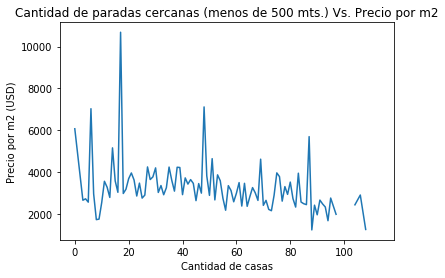

In [94]:
props_2017_cant_paradas_colectivo = props_2017
usd__bus_station_2017= props_2017_cant_paradas_colectivo.groupby('cantidad paradas cercanas').agg({'price_usd_per_m2': [np.mean]})
plt.title('Cantidad de paradas cercanas (menos de 500 mts.) Vs. Precio por m2')
plt.ylabel('Precio por m2 (USD)')
plt.xlabel('Precio por m2 (USD)')

plt.plot(usd__bus_station_2017)


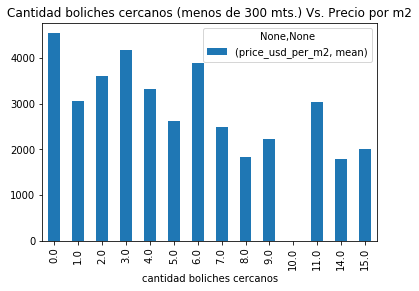

In [130]:
props_2017_cant_paradas_colectivo = props_2017
usd__bus_station_2017= props_2017_cant_paradas_colectivo.groupby('cantidad boliches cercanos').agg({'price_usd_per_m2': [np.mean]})

usd__bus_station_2017.plot(kind='bar', title= 'Cantidad boliches cercanos (menos de 300 mts.) Vs. Precio por m2')

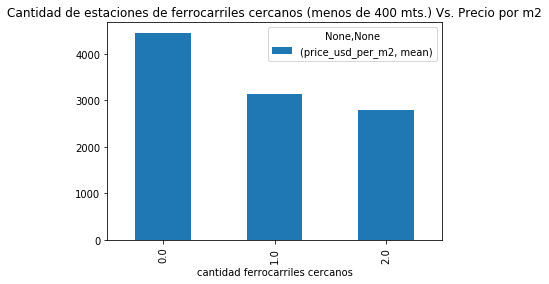

In [109]:
props_2017_cant_paradas_colectivo = props_2017
usd__bus_station_2017= props_2017_cant_paradas_colectivo.groupby('cantidad ferrocarriles cercanos').agg({'price_usd_per_m2': [np.mean]})

usd__bus_station_2017.plot(kind='bar', title= 'Cantidad de estaciones de ferrocarriles cercanos (menos de 400 mts.) Vs. Precio por m2')

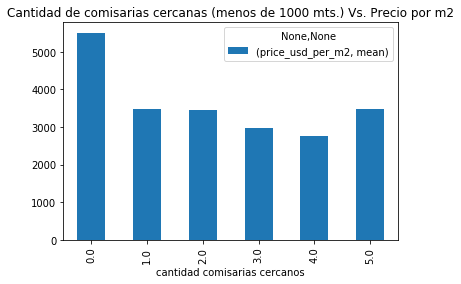

In [116]:
props_2017_cant_paradas_colectivo = props_2017
usd__bus_station_2017= props_2017_cant_paradas_colectivo.groupby('cantidad comisarias cercanos').agg({'price_usd_per_m2': [np.mean]})

usd__bus_station_2017.plot(kind='bar', title= 'Cantidad de comisarias cercanas (menos de 1000 mts.) Vs. Precio por m2')